In [ ]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
import platform

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [ ]:
#이틀 전부터 제조 불량률의 급작스러운 증가.
#더이상의 불량율을 막기 위해 급하게 우리 알파코TF팀이 구성.
#불량율이 증가한 2일간의 데이터를 수집하였으며 다음과 같음.

In [ ]:
import pandas as pd
import seaborn as sns

print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

steel = pd.read_csv('철강_제조데이터/steel_date.csv') 
steel

pandas version:  1.4.2


,Unnamed: 0.1,Unnamed: 0,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,0,PB562774,2008-08-01 00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,1,PB562775,2008-08-01 00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,2,2,PB562776,2008-08-01 00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,3,3,PB562777,2008-08-01 00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,4,4,PB562778,2008-08-01 00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,715,PB563502,2008-08-02 13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,1,1172,72,1164,62,245,1164,1005,적용,8,2조
716,716,716,PB563503,2008-08-02 13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,1,1150,61,1169,61,238,1169,947,적용,10,1조
717,717,717,PB563504,2008-08-02 14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,2,1169,65,1163,77,247,1163,948,적용,10,4조
718,718,718,PB563505,2008-08-02 13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,2,1179,86,1163,45,243,1163,940,적용,10,2조


In [ ]:
steel.isnull().sum() 
#수집한 데이터에는 결측치 없음.

Unnamed: 0.1         0
Unnamed: 0           0
PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [ ]:
steel['SCALE'].value_counts()
#총 720번의 제작 가운데 231개의 불량 출현
#무려 1/3에 가까운 불량율.

양품    489
불량    231
Name: SCALE, dtype: int64

In [ ]:
#원인이 있다고 생각되는 데이터는 다음과 같음.

In [ ]:
steel['SPEC'].nunique()

66

In [ ]:
steel['STEEL_KIND'].nunique()

9

In [ ]:
steel['PT_THK'].nunique()

152

In [ ]:
steel['PT_WDTH'].nunique()

343

In [ ]:
steel['PT_LTH'].nunique()

505

In [ ]:
steel['PT_WGT'].nunique()

433

In [ ]:
steel['FUR_NO'].nunique()

3

In [ ]:
steel['FUR_NO_ROW'].nunique()

2

In [ ]:
steel['FUR_HZ_TEMP'].nunique()

100

In [ ]:
steel['FUR_HZ_TIME'].nunique()

135

In [ ]:
steel['FUR_SZ_TEMP'].nunique()

70

In [ ]:
steel['FUR_SZ_TIME'].nunique()

131

In [ ]:
steel['FUR_TIME'].nunique()

153

In [ ]:
steel['FUR_EXTEMP'].nunique()

70

In [ ]:
steel['ROLLING_TEMP_T5'].nunique()

226

In [ ]:
steel['HSB'].nunique()

2

In [ ]:
steel['ROLLING_DESCALING'].nunique()

6

In [ ]:
steel['WORK_GR'].nunique()

4

In [ ]:
#먼저 제작 종류에 따른 불량갯수
steel_kind_scale = steel.groupby(['STEEL_KIND','SCALE'],as_index = False).agg(count=('SCALE','count'))
steel_kind_scale

,STEEL_KIND,SCALE,count
0,C0,불량,212
1,C0,양품,291
2,C1,불량,1
3,C3,불량,1
4,C3,양품,6
5,T0,불량,2
6,T0,양품,14
7,T1,불량,2
8,T1,양품,16
9,T3,양품,2


<AxesSubplot:title={'center':'제작 종류에 따른 불량 횟수 계산'}, xlabel='STEEL_KIND', ylabel='count'>

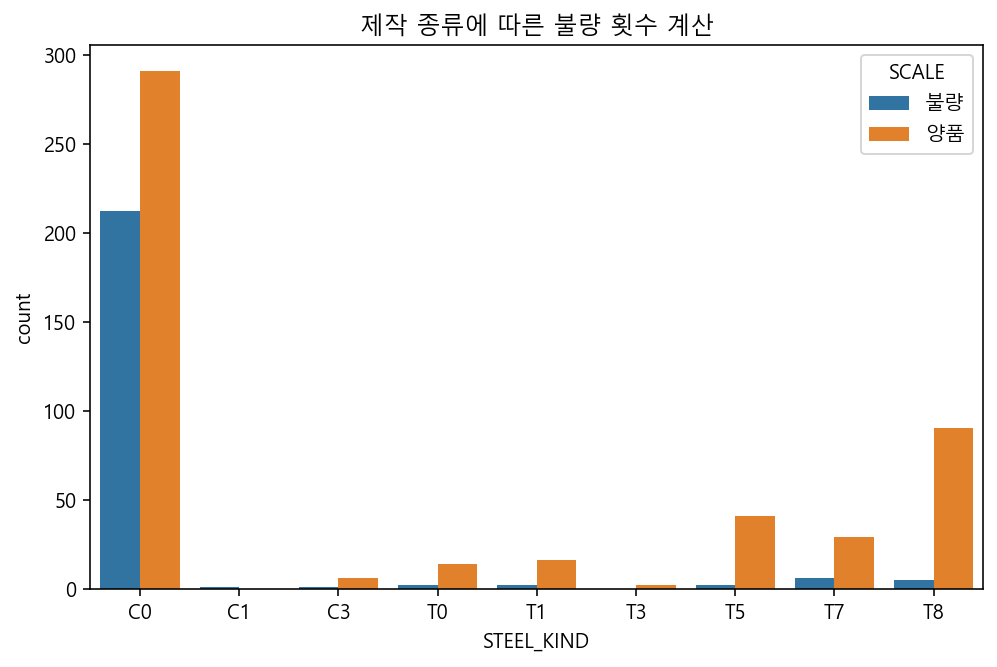

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('제작 종류에 따른 불량 횟수 계산')
sns.barplot(data = steel_kind_scale , x = 'STEEL_KIND' , y = 'count' , hue ='SCALE')

In [ ]:
#C0 품목에서 압도적으로 많은 불량품 갯수가 보임.
#다만 C1과 같이 100%의 비율도 존재하는 한 편, T7과 같이 1/5에 가까운 불량 발생율을 보아
#단순히 많이 제작해서인지, 아니면 C0 품목에 무슨 문제가 있는지를 확인해보았음.

In [ ]:
#제강 공정 중 생산시설 번호 및 행에 따른 총 불량 갯수에 대한 C0 품목의 비율.

In [ ]:
steel_error = steel[steel['SCALE'] == '불량']
steel_error_per = steel_error.groupby(['FUR_NO', 'FUR_NO_ROW','SCALE'],as_index =False).agg(count = ('SCALE','count')) 
steel_error_per['C0'] = steel_error[steel_error['STEEL_KIND'] == 'C0'].groupby(['FUR_NO', 'FUR_NO_ROW','SCALE'],as_index =False).agg(count = ('SCALE','count'))['count'] 
steel_error_per['PER'] = steel_error_per['C0'] / steel_error_per['count']
steel_error_per

,FUR_NO,FUR_NO_ROW,SCALE,count,C0,PER
0,1호기,1,불량,42,40,0.952381
1,1호기,2,불량,31,26,0.838710
2,2호기,1,불량,35,34,0.971429
3,2호기,2,불량,35,32,0.914286
4,3호기,1,불량,43,40,0.930233
5,3호기,2,불량,45,40,0.888889


<AxesSubplot:title={'center':'공정별 C0품목의 불량 비율'}, xlabel='FUR_NO', ylabel='PER'>

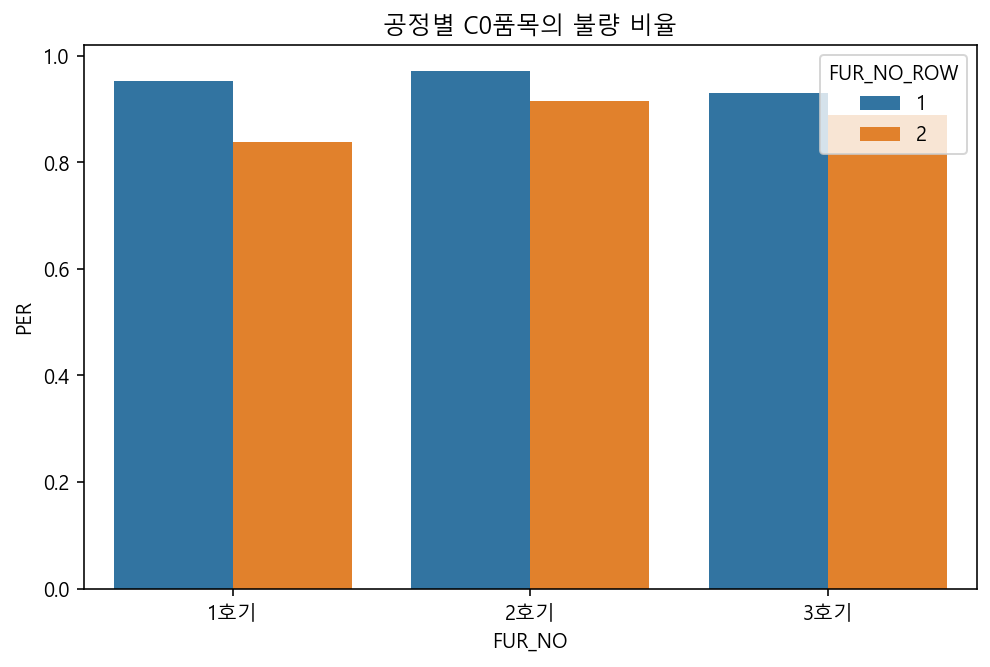

In [ ]:
plt.figure(figsize = (8, 5))
plt.title('공정별 C0품목의 불량 비율')
sns.barplot(data = steel_error_per , x = 'FUR_NO' , y = 'PER' , hue ='FUR_NO_ROW')

In [ ]:
#이를 보면 제강 과정 중, 생산 호기에 관계없이 1행의 공정에서는 C0품목의 불량 비율이 95%내외를 차지함.
#즉, C0를 제외한 항목의 불량율은 평균 6%에 해당하는 일반적인 수준이기에 문제가 없다고 볼 수 있음.
#다만 2행에 대해선 C0가 아닌 항목의 불량율이 10%대에 이르기 때문에 다른 문제가 있을 것으로 추측됨.

In [ ]:
#즉, 큰 틀로 보자면 전체적으로 현 C0품목을 생산하는 과정에 문제가 있는건 확실.
#또다른 측면에서는 생산 행에 대해서 2행 공정에는 C0품목이 아닌 다른 원인이 있는것으로 파악.
#하지만 이는 우리 회사의 주력 품목인 C0를 개선하는 것에 비해 중요도가 낮다고 생각됨.
#C0 품목에 대해 선택하고 집중하고자 함.

In [ ]:
steel_C0 = steel[steel['STEEL_KIND'] == 'C0']
steel_C0.count()[0]

503

In [ ]:
steel_C0[(steel_C0['SCALE'] == '양품')].count()[0]

291

In [ ]:
steel_C0[(steel_C0['SCALE'] == '불량')].count()[0]

212

In [ ]:
steel_C0[(steel_C0['SCALE'] == '양품') & (steel_C0['HSB'] == '적용')].count()[0]

291

In [ ]:
steel_C0[(steel_C0['SCALE'] == '불량') & (steel_C0['HSB'] == '적용')].count()[0]

190

In [ ]:
steel_C0[(steel_C0['SCALE'] == '양품') & (steel_C0['HSB'] == '미적용')].count()[0]

0

In [ ]:
steel_C0[(steel_C0['SCALE'] == '불량') & (steel_C0['HSB'] == '미적용')].count()[0]

22

In [ ]:
steel_C0[(steel_C0['HSB'] == '미적용')].count()[0]

22

In [ ]:
#특이사항으로 제작되는 철강 종류에 맞춰 이번에 새로운 단조 과정으로 고성능강(HSB, High performance Steel for Bridges)라인을 적용.
#따라서 비단 C0뿐만 아니고, 반드시 HSB공정을 적용해야만 양품이 나올 수 있음.

<AxesSubplot:title={'center':'HSB적용 여부에 따른 불량가능성의 확인.'}, xlabel='HSB', ylabel='count'>

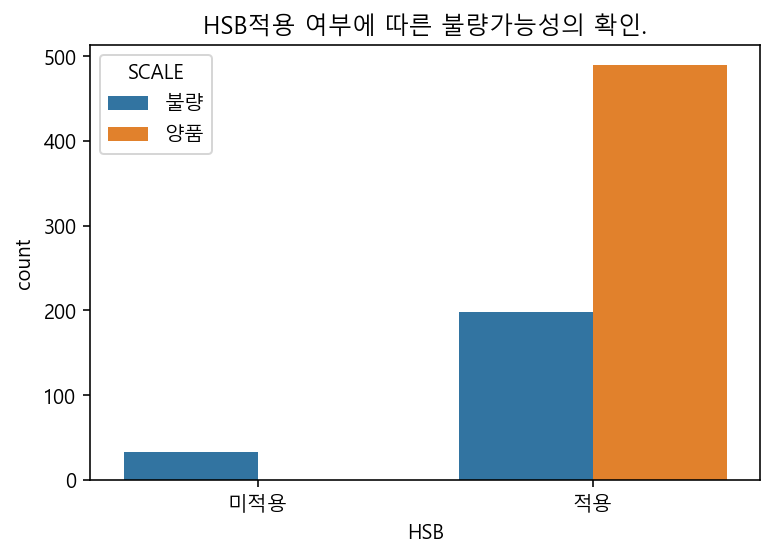

In [ ]:
steel_HSB = steel.groupby(['HSB','SCALE'],as_index = False).agg(count = ('SCALE','count'))

plt.title('HSB적용 여부에 따른 불량가능성의 확인.')
sns.barplot(data = steel_HSB ,x ='HSB',y='count',hue ='SCALE') 

In [ ]:
steel[(steel['SCALE'] == '양품') &(steel['HSB'] == '미적용')].count()[0]

0

In [ ]:
steel[(steel['SCALE'] == '불량') &(steel['HSB'] == '미적용')].count()[0]

33

In [ ]:
steel[(steel['SCALE'] == '양품') &(steel['HSB'] == '적용')].count()[0]

489

In [ ]:
steel[(steel['SCALE'] == '불량') &(steel['HSB'] == '적용')].count()[0]

198

In [ ]:
steel[(steel['HSB'] == '미적용')].count()[0]

33

In [ ]:
steel[(steel['HSB'] == '적용')].count()[0]

687

In [ ]:
# 제작 날짜의 AM ,PM 불량률의 증감.
steel['ROLLING_DATE']= pd.to_datetime(steel['ROLLING_DATE'])
steel['ROLLING_DAY'] = steel['ROLLING_DATE'].dt.strftime('%m-%d')
steel['ROLLING_HOUR'] = steel['ROLLING_DATE'].dt.strftime('%H')
steel['ROLLING_HOUR'] = steel['ROLLING_HOUR'].astype('int')

In [ ]:
def AMPM(x):
    if x >= 12 :
        return "PM"
    else :
        return "AM"
steel['AMPM'] = steel['ROLLING_HOUR'].apply(AMPM)
steel['steel_AMPM'] = steel['ROLLING_DAY'] + steel['AMPM']

In [ ]:
steel_day_error = steel[steel['STEEL_KIND'] == 'C0']
steel_day_error = steel_day_error[steel['SCALE'].isin(['불량'])]
steel_day_error = steel_day_error.groupby(['steel_AMPM'],as_index =False).agg(count = ('SCALE','count'))

C:\Users\YANG\AppData\Local\Temp\ipykernel_6956\1315633437.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  steel_day_error = steel_day_error[steel['SCALE'].isin(['불량'])]


<AxesSubplot:title={'center':'제작 날짜의 AM ,PM 불량률의 증감.'}, xlabel='steel_AMPM', ylabel='count'>

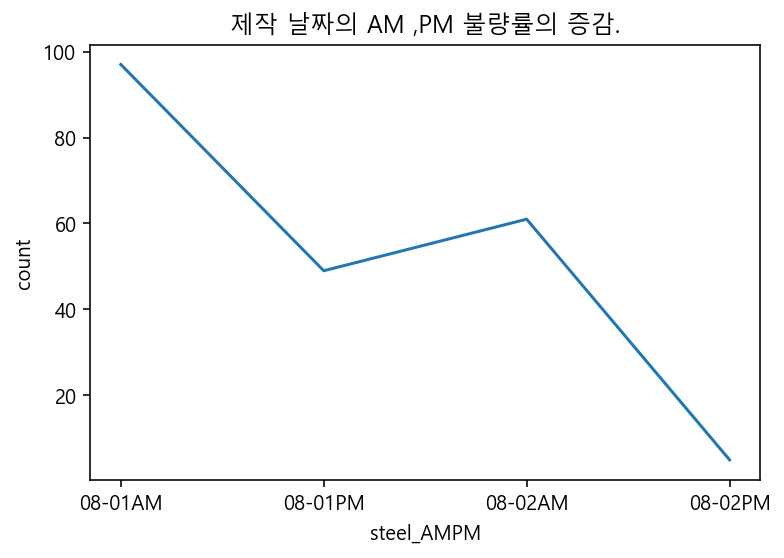

In [ ]:
plt.title('제작 날짜의 AM ,PM 불량률의 증감.')
sns.lineplot(data = steel_day_error, x='steel_AMPM', y = 'count', )

In [ ]:
steel_day_error

,steel_AMPM,count
0,08-01AM,97
1,08-01PM,49
2,08-02AM,61
3,08-02PM,5


In [ ]:
steel_C0 = steel[steel['STEEL_KIND'] == 'C0']

In [ ]:
# ROLLING_DESCALING 작업 횟수별 양품과 불량품
steel_GR= steel_C0.groupby(['ROLLING_DESCALING','SCALE'],as_index =False).agg(count = ('SCALE','count'))
steel_GR

,ROLLING_DESCALING,SCALE,count
0,6,불량,17
1,6,양품,1
2,7,불량,15
3,8,불량,96
4,8,양품,65
5,9,불량,19
6,10,불량,65
7,10,양품,225


<AxesSubplot:title={'center':'ROLLING_DESCALING 작업 횟수별 양품과 불량품'}, xlabel='ROLLING_DESCALING', ylabel='count'>

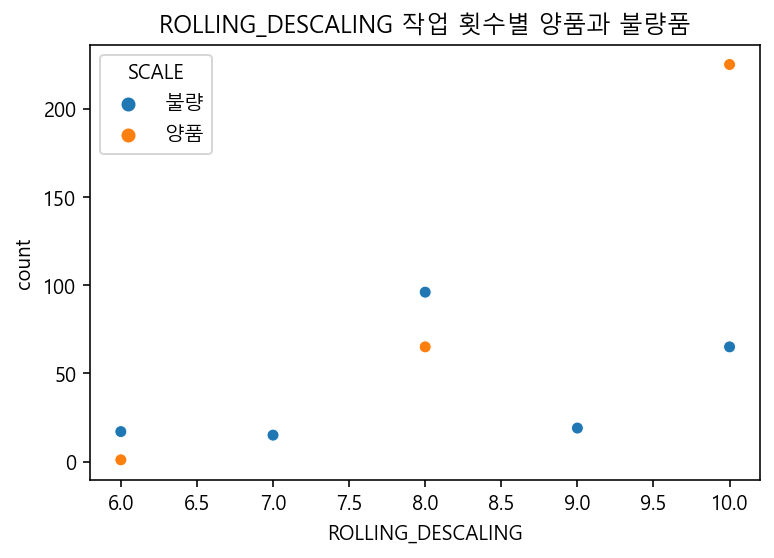

In [ ]:
plt.title('ROLLING_DESCALING 작업 횟수별 양품과 불량품')
sns.scatterplot(data = steel_GR, x= 'ROLLING_DESCALING', y='count' ,hue ='SCALE')

In [ ]:
# SPEC, 작업그룹 별 불량갯수
steel['SCALE_NUM'] = steel['SCALE'].str.replace('양품','0').replace('불량','1')
steel_error = steel[steel['STEEL_KIND'] == 'C0']
steel_error = steel_error[steel['SCALE'].isin(['불량'])]
steel_NUM = steel_error.groupby(['WORK_GR', 'SPEC'],as_index= False).agg(count =('SCALE_NUM','count'))
steel_NUM['count'].unique()

C:\Users\YANG\AppData\Local\Temp\ipykernel_6956\3293152911.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  steel_error = steel_error[steel['SCALE'].isin(['불량'])]


array([ 2,  4,  1, 12,  6,  3,  9,  5,  8, 15], dtype=int64)

<AxesSubplot:title={'center':'SPEC, 작업그룹 별 불량갯수'}, xlabel='count', ylabel='SPEC'>

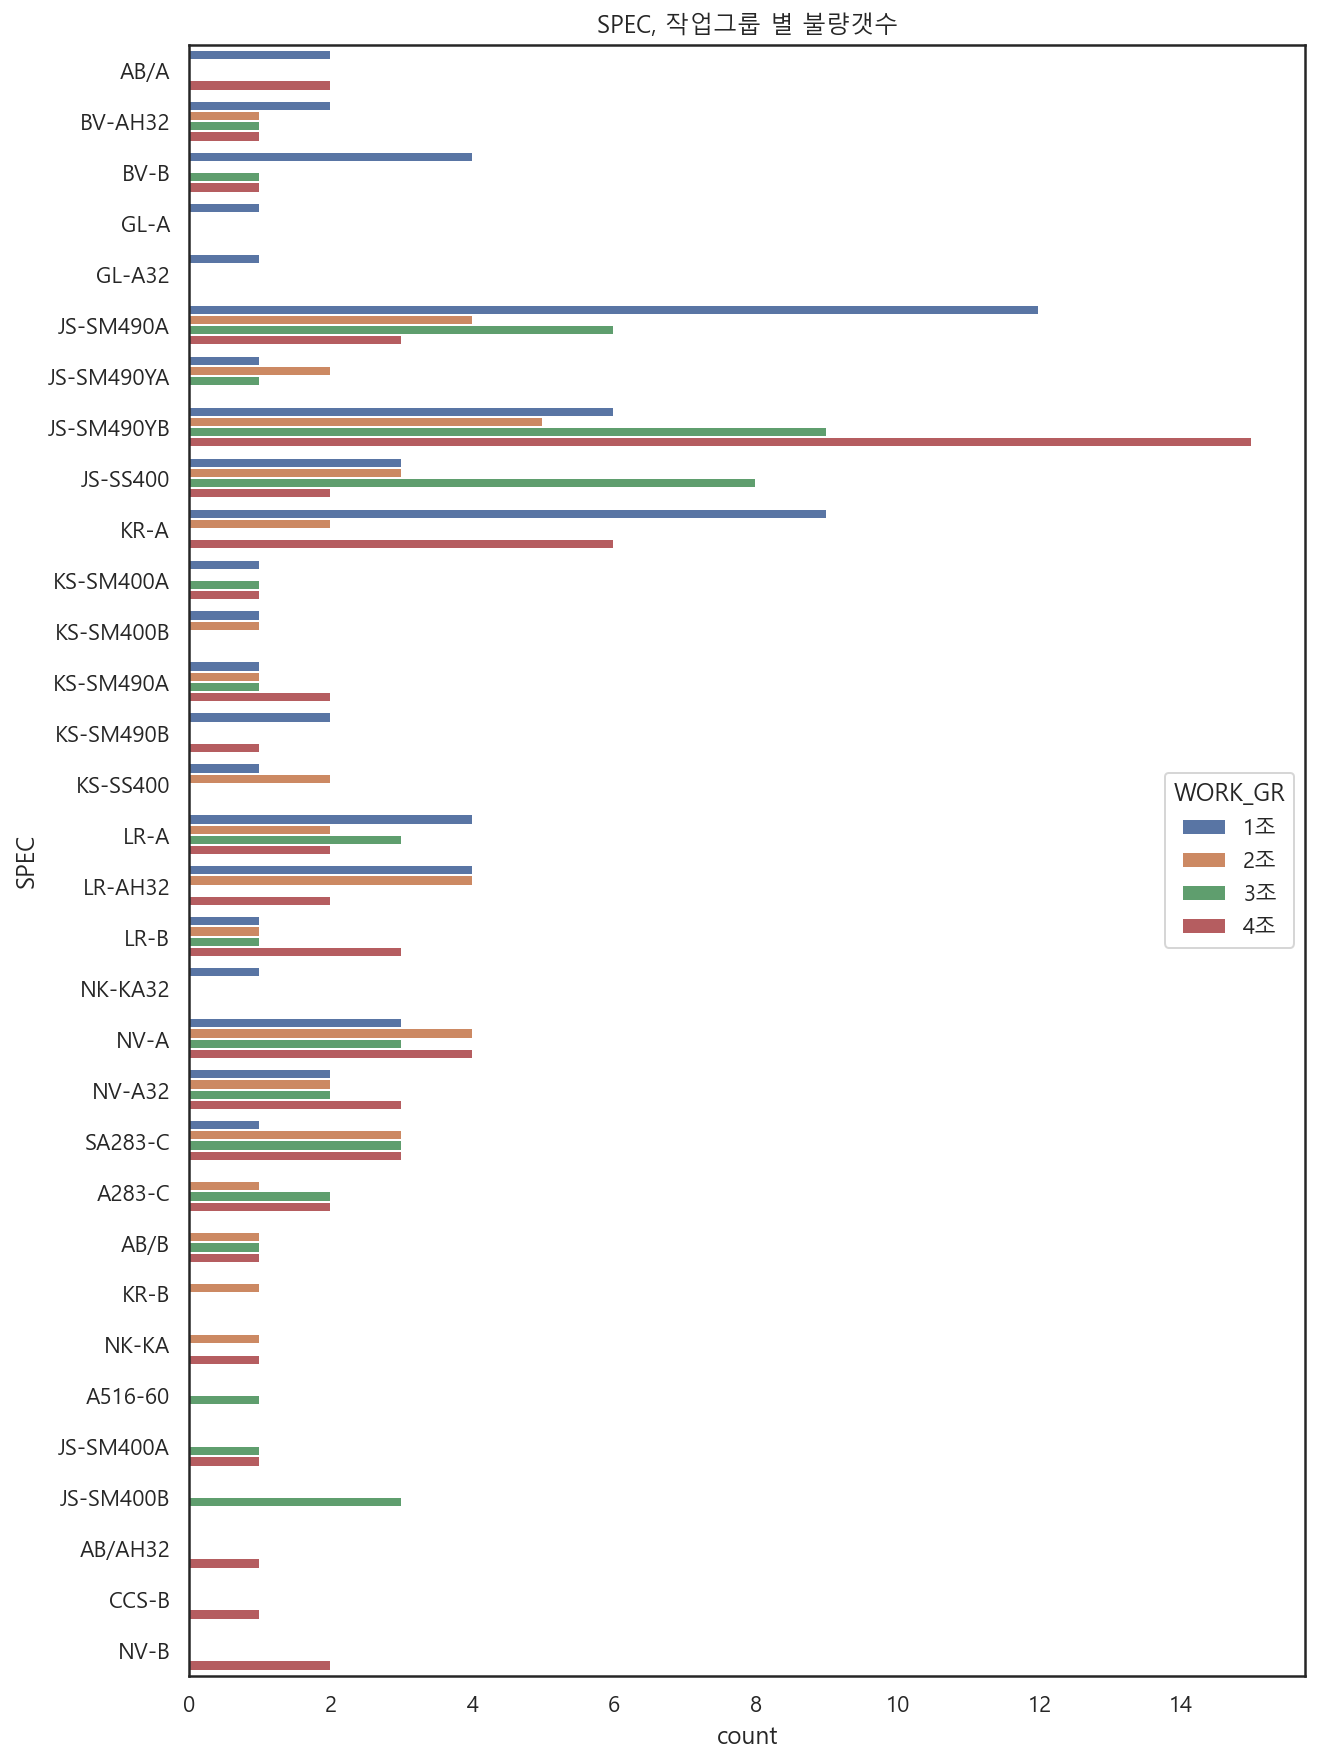

In [ ]:
plt.figure(figsize = (10, 15))
plt.title('SPEC, 작업그룹 별 불량갯수')
sns.barplot(data = steel_NUM , x= 'count', y='SPEC', hue= 'WORK_GR')

In [ ]:
#2~4사이의 사소한 불량은 작업자의 실수라고 생각됨. 직원 교육을 다시 할 필요가 있어보임.

In [ ]:
# 롤링_온도와 SCALE의 관계 여부
def TEMP_10(x):
    if x//100 == 7:
        return 700
    elif x//100 == 8:
        return 800
    elif x//100 == 9:
        return 900
    elif x//100 == 10:
        return 1000
    else :
        return 0

steel['TEMP_10'] = steel['ROLLING_TEMP_T5'].apply(TEMP_10)

In [ ]:
steel['SCALE_NUM'] = steel['SCALE'].str.replace('양품','0').replace('불량','1')
steel_TMP = steel[steel['STEEL_KIND'] == 'C0']
steel_TMP = steel_TMP.groupby(['TEMP_10','SCALE'],as_index =False).agg(count=('SCALE_NUM','count'))
steel_TMP

,TEMP_10,SCALE,count
0,0,양품,2
1,700,양품,1
2,800,불량,2
3,800,양품,24
4,900,불량,61
5,900,양품,260
6,1000,불량,149
7,1000,양품,4


<AxesSubplot:xlabel='TEMP_10', ylabel='count'>

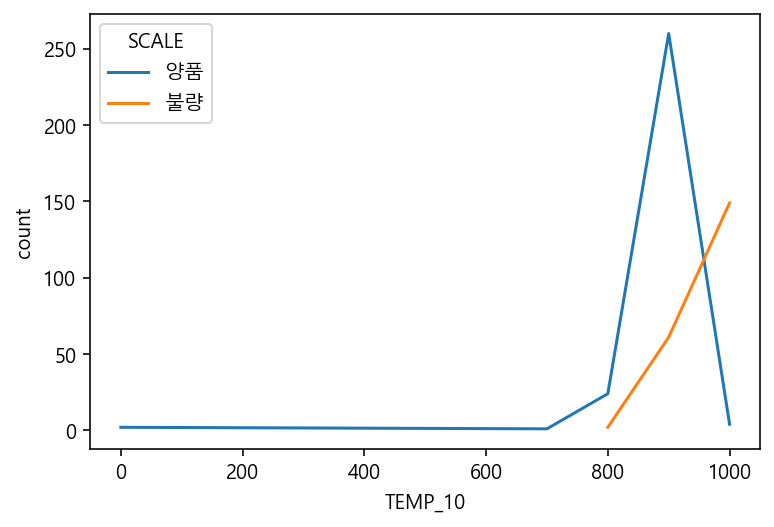

In [ ]:
sns.lineplot(data = steel_TMP, x='TEMP_10',y='count' , hue = 'SCALE')

In [ ]:
steel['FUR_HZ_TEMP'].unique()
#일반적으로 압연과정에서 이루어지는 롤링의 온도는 800~1000도 사이.
#그래프를 보면 단 몇 도의 차이로도 불량의 비율이 기하급수적으로 늘어나는것을 볼 수 있음.
#900도씨 내외의 낮은 온도가 가장 이상적으로 보임.

array([1144, 1129, 1152, 1140, 1143, 1138, 1139, 1127, 1135, 1131, 1132,
       1119, 1134, 1124, 1110, 1114, 1113, 1118, 1117, 1108, 1123, 1126,
       1111, 1133, 1122, 1137, 1112, 1125, 1130, 1141, 1142, 1145, 1147,
       1136, 1116, 1151, 1154, 1148, 1150, 1158, 1159, 1146, 1167, 1169,
       1165, 1155, 1172, 1170, 1163, 1162, 1171, 1166, 1176, 1175, 1173,
       1174, 1168, 1164, 1157, 1161, 1177, 1156, 1160, 1153, 1149, 1128,
       1121, 1115, 1184, 1183, 1186, 1181, 1180, 1178, 1189, 1191, 1190,
       1195, 1202, 1203, 1182, 1197, 1199, 1196, 1198, 1205, 1206, 1185,
       1187, 1192, 1194, 1193, 1204, 1200, 1179, 1106, 1120, 1109, 1103,
       1188], dtype=int64)

In [ ]:
# 가열로 내부시간과 SCALE과의 관계
def FUR_T(x):
    if x>=350 :
        return 350
    elif x>= 300:
        return 300
    elif x>= 250:
        return 250
    else :
        200

In [ ]:
steel['FUR_T'] = steel['FUR_TIME'].apply(FUR_T)
steel_FUR_T= steel.groupby(['FUR_T','SCALE'],as_index=False).agg(count=('SCALE','count'))

,FUR_T,SCALE,count
0,250.0,불량,77
1,250.0,양품,152
2,300.0,불량,99
3,300.0,양품,165
4,350.0,불량,16
5,350.0,양품,87


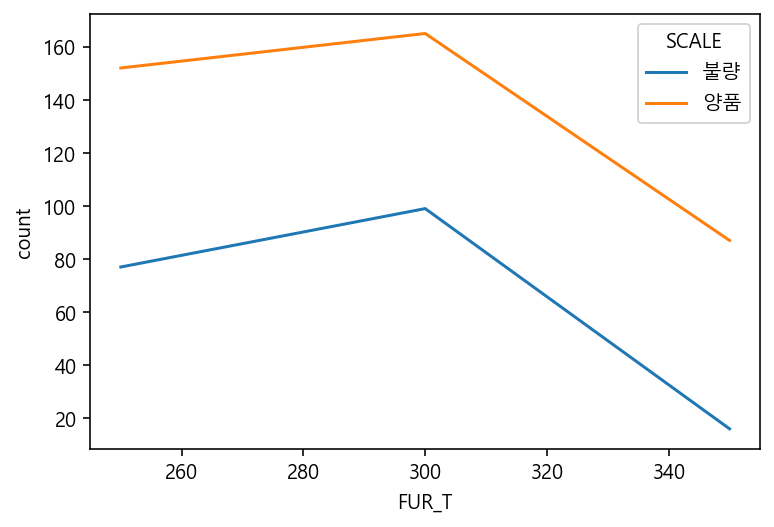

In [ ]:
sns.lineplot(data = steel_FUR_T, x='FUR_T', y= 'count', hue='SCALE')
steel_FUR_T

In [ ]:
steel['FUR_T'] = steel['FUR_TIME'].apply(FUR_T)
steel_FUR_TC0 = steel[steel['STEEL_KIND'] == 'C0']
steel_FUR_TC0 = steel_FUR_TC0.groupby(['FUR_T','SCALE'],as_index=False).agg(count=('SCALE','count'))

,FUR_T,SCALE,count
0,250.0,불량,75
1,250.0,양품,105
2,300.0,불량,87
3,300.0,양품,78
4,350.0,불량,13
5,350.0,양품,31


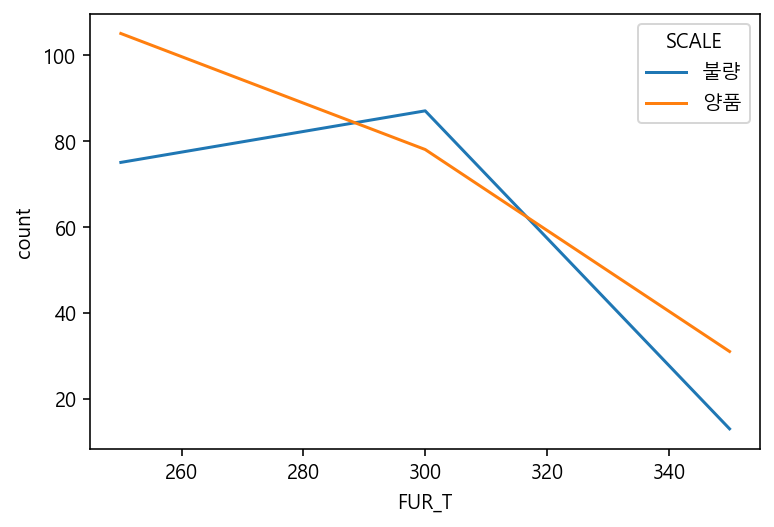

In [ ]:
sns.lineplot(data = steel_FUR_TC0, x='FUR_T', y= 'count', hue='SCALE')
steel_FUR_TC0

In [ ]:
#C0항목에 대해선 오히려 300초의 시간이 좋지 않음.
#즉, 일반적인 품목을 단조할 경우는 300초도 나쁘지 않으나, C0항목까지 고려할 경우 250초에서 끊는 것이 가장 좋아보임.

steel_FUR_TC0['NON_C0'] = steel_FUR_T['count'] - steel_FUR_TC0['count']

In [ ]:
steel_FUR_TC0

,FUR_T,SCALE,count,NON_C0
0,250.0,불량,75,2
1,250.0,양품,105,47
2,300.0,불량,87,12
3,300.0,양품,78,87
4,350.0,불량,13,3
5,350.0,양품,31,56


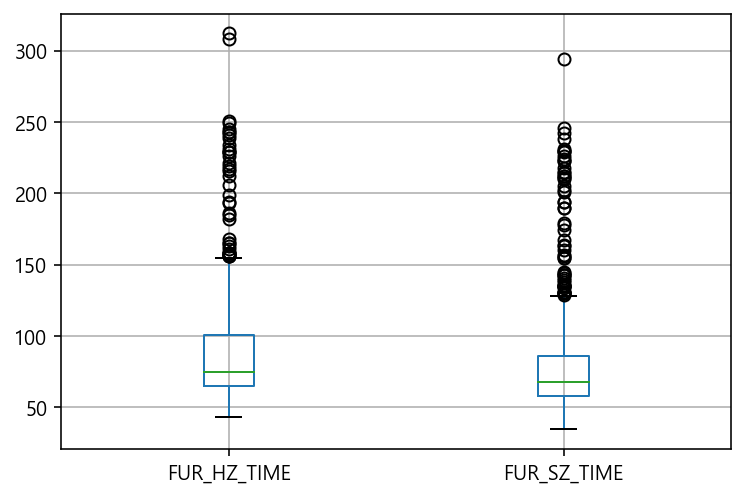

In [ ]:
steel.boxplot(column = ['FUR_HZ_TIME', 'FUR_SZ_TIME'])
plt.title('HZ, SZ 가열로 시간 분포의 box plot')
plt.show() # HZ, SZ 가열로 시간 분포의 box plot.

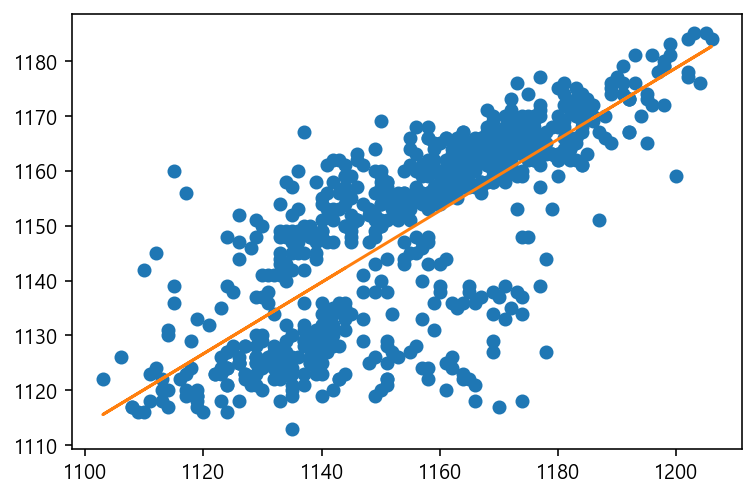

상관계수는 0.773


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = steel['FUR_HZ_TEMP']
y = steel['FUR_SZ_TEMP']

line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

plt.plot(x, y, 'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.title(HZ, SZ 가열로 온도에 따른 상관관계 분석)
plt.show() # HZ, SZ 가열로 온도에 따라 Regression 진행

cor = np.corrcoef(x, y)[0,1]
print(f"상관계수는 {cor:.3f}")
# HZ, SZ 가열로 온도에 따른 상관계수 분석. 분석결과 상관관계가 높은 것으로 나옴. 이 관계를 중점으로 불량이 발생할듯.
#강한 양적 상관관계

In [ ]:
#상세한 상관관계 조사
lst = [steel['FUR_HZ_TEMP'], steel['FUR_HZ_TIME'], steel['FUR_SZ_TEMP'], steel['FUR_SZ_TIME']]
df = pd.DataFrame(lst).T
corr = df.corr(method = 'pearson')
print(corr)

             FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME
FUR_HZ_TEMP     1.000000    -0.114395     0.772907    -0.222141
FUR_HZ_TIME    -0.114395     1.000000    -0.203401     0.177922
FUR_SZ_TEMP     0.772907    -0.203401     1.000000    -0.450652
FUR_SZ_TIME    -0.222141     0.177922    -0.450652     1.000000


In [ ]:
#C0로 줄일 경우 상관관계가 더욱 강해짐.
testlst = steel[steel['STEEL_KIND'] == 'C0']
testlst = [testlst['FUR_HZ_TEMP'], testlst['FUR_HZ_TIME'], testlst['FUR_SZ_TEMP'], testlst['FUR_SZ_TIME']]
df = pd.DataFrame(testlst).T
corr = df.corr(method = 'pearson')
print(corr)

             FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  FUR_SZ_TIME
FUR_HZ_TEMP     1.000000    -0.086377     0.792320    -0.191196
FUR_HZ_TIME    -0.086377     1.000000    -0.175901     0.237392
FUR_SZ_TEMP     0.792320    -0.175901     1.000000    -0.523054
FUR_SZ_TIME    -0.191196     0.237392    -0.523054     1.000000


<AxesSubplot:title={'center':'TEMPER'}, xlabel='FUR_SZ_TEMP', ylabel='FUR_HZ_TEMP'>

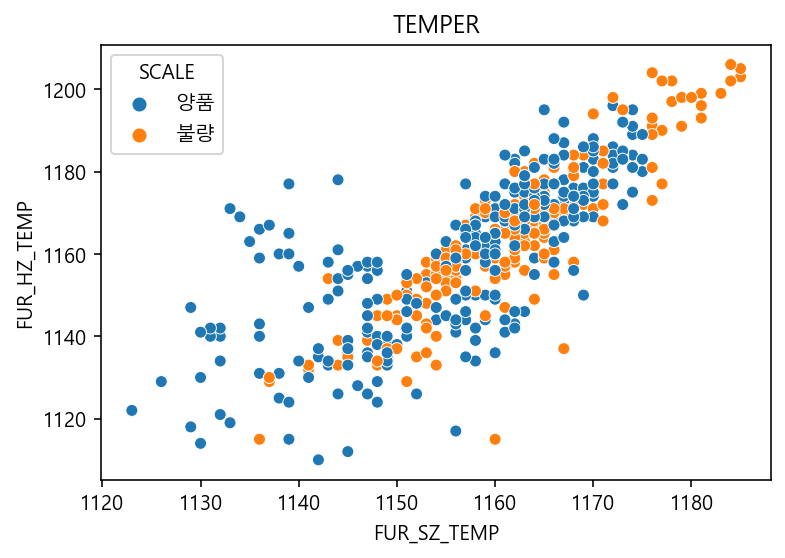

In [ ]:
#따라서 균열대 온도가 높아질수록 불량율이 매우 크게 증가하는 모습을 띔.
plt.title('TEMPER')
sns.scatterplot(data = steel[steel['STEEL_KIND'] == 'C0'], x= 'FUR_SZ_TEMP', y='FUR_HZ_TEMP' ,hue ='SCALE')

C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages

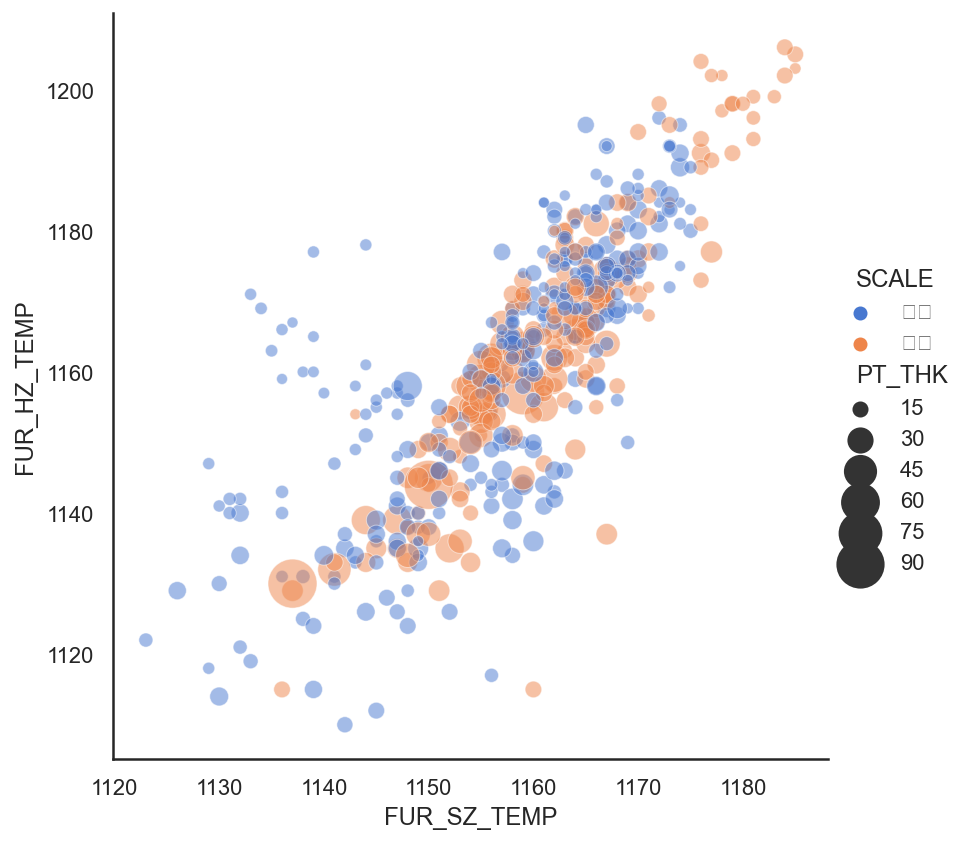

In [ ]:
sns.set_theme(style="white")
aaaaa = sns.relplot(x="FUR_SZ_TEMP", y="FUR_HZ_TEMP", hue="SCALE", size="PT_THK",
            sizes=(30, 600), alpha=.5, palette="muted",
            height=6, data=steel[steel['STEEL_KIND'] == 'C0'])

C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages

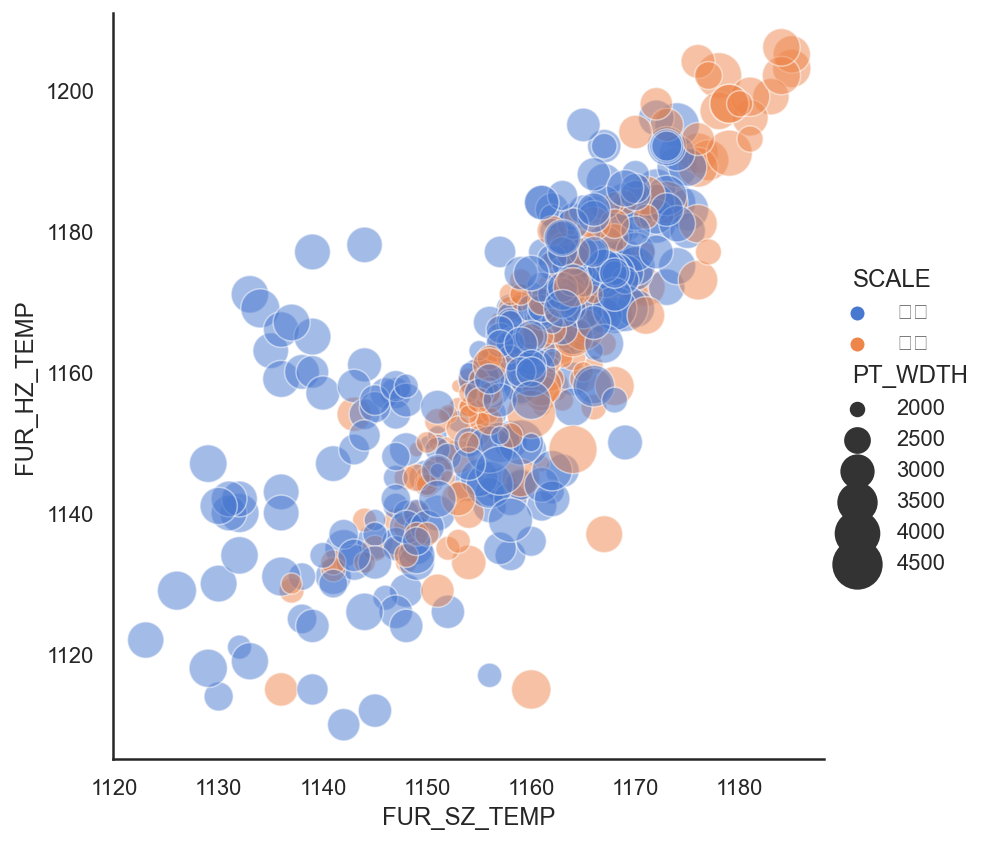

In [ ]:
sns.set_theme(style="white")
aaaaa = sns.relplot(x="FUR_SZ_TEMP", y="FUR_HZ_TEMP", hue="SCALE", size="PT_WDTH",
            sizes=(30, 600), alpha=.5, palette="muted",
            height=6, data=steel[steel['STEEL_KIND'] == 'C0'])

C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages

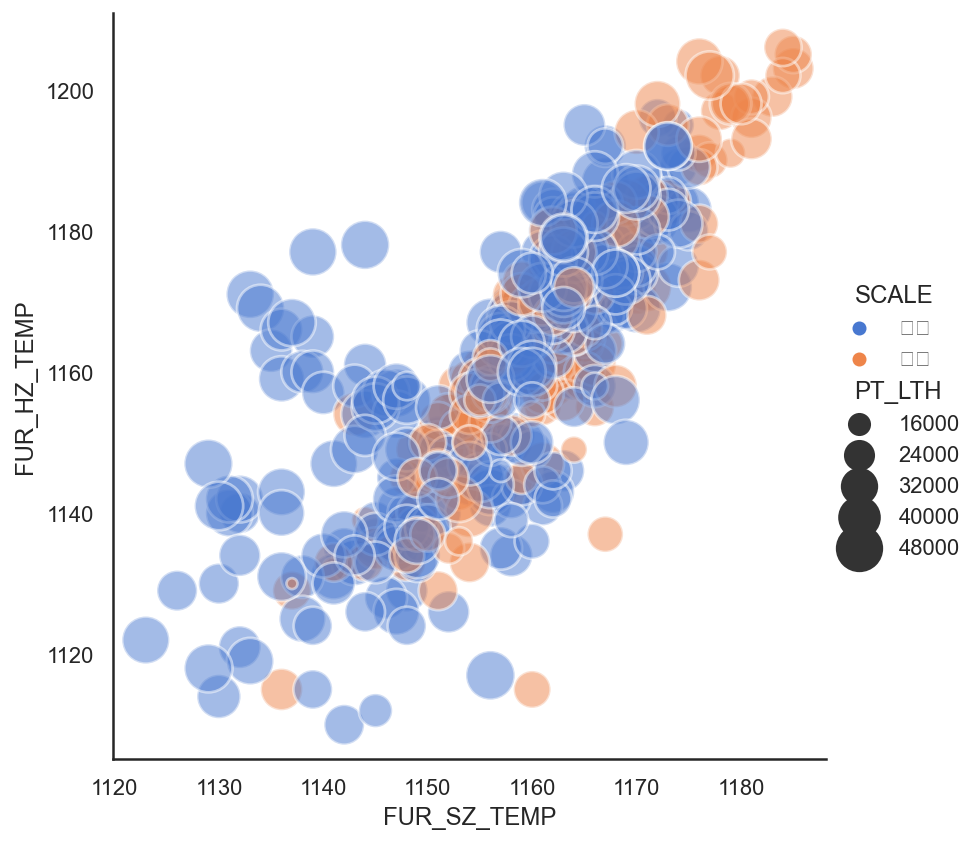

In [ ]:
sns.set_theme(style="white")
aaaaa = sns.relplot(x="FUR_SZ_TEMP", y="FUR_HZ_TEMP", hue="SCALE", size="PT_LTH",
            sizes=(30, 600), alpha=.5, palette="muted",
            height=6, data=steel[steel['STEEL_KIND'] == 'C0'])

C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages

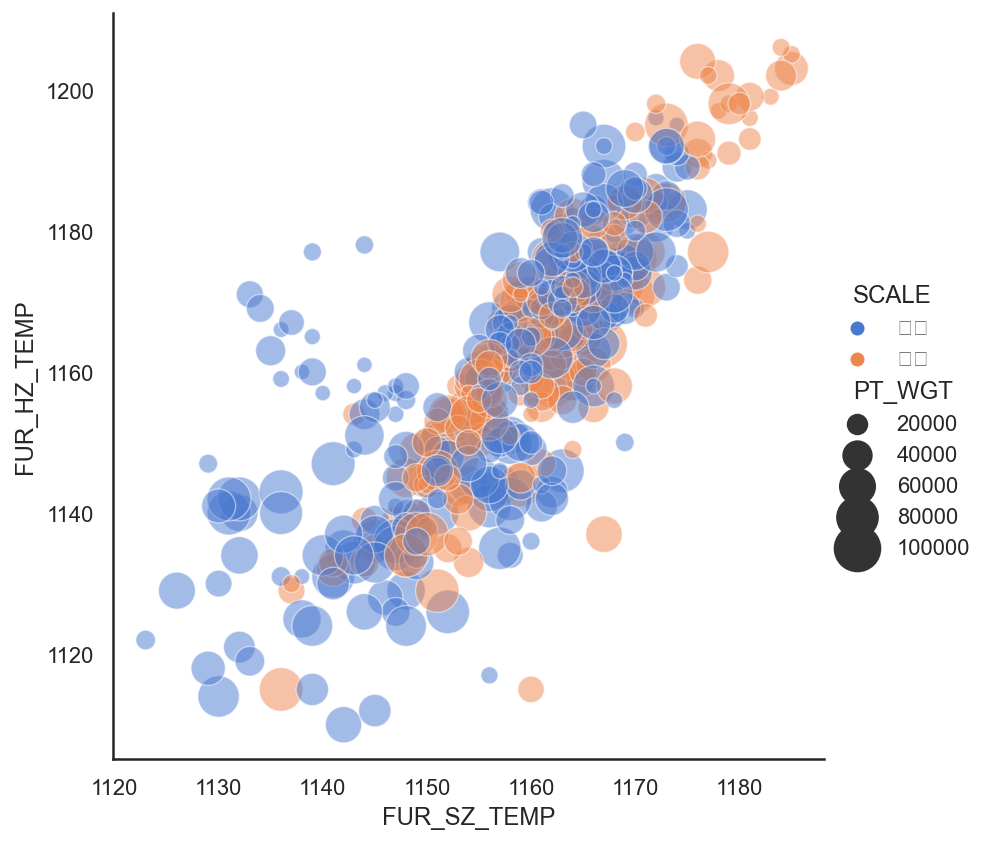

In [ ]:
sns.set_theme(style="white")
aaaaa = sns.relplot(x="FUR_SZ_TEMP", y="FUR_HZ_TEMP", hue="SCALE", size="PT_WGT",
            sizes=(30, 600), alpha=.5, palette="muted",
            height=6, data=steel[steel['STEEL_KIND'] == 'C0'])

C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages

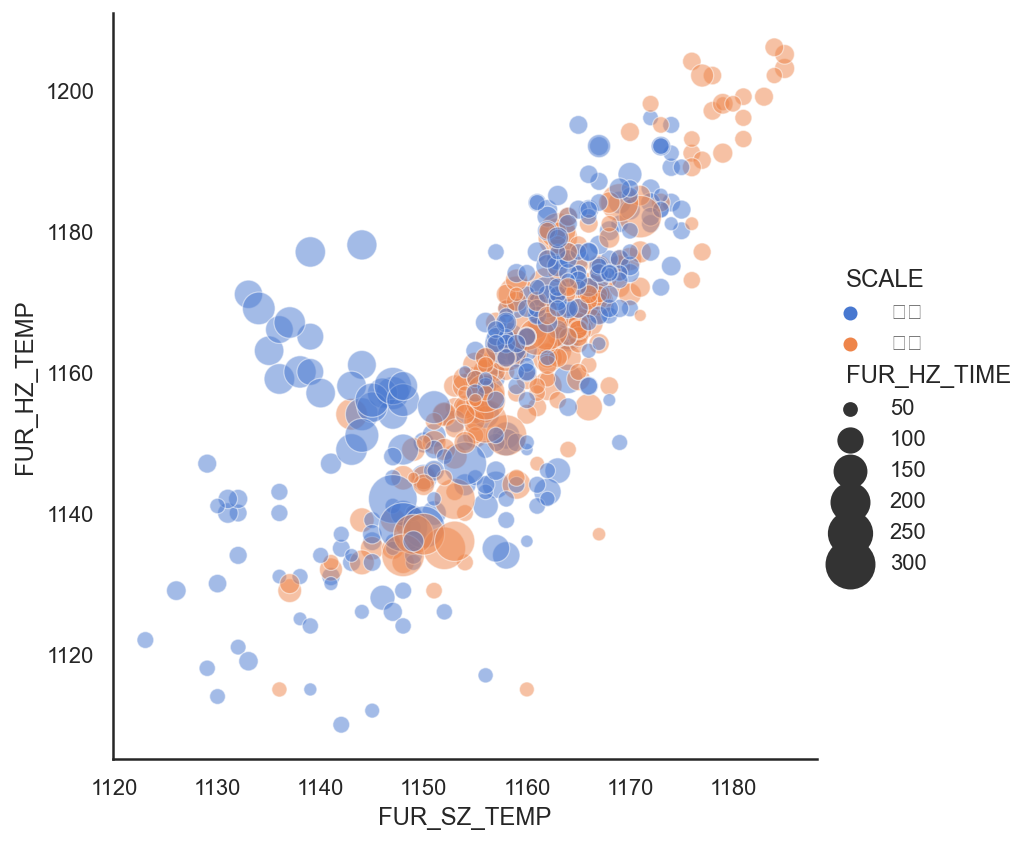

In [ ]:
sns.set_theme(style="white")
aaaaa = sns.relplot(x="FUR_SZ_TEMP", y="FUR_HZ_TEMP", hue="SCALE", size="FUR_HZ_TIME",
            sizes=(30, 600), alpha=.5, palette="muted",
            height=6, data=steel[steel['STEEL_KIND'] == 'C0'])

C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages

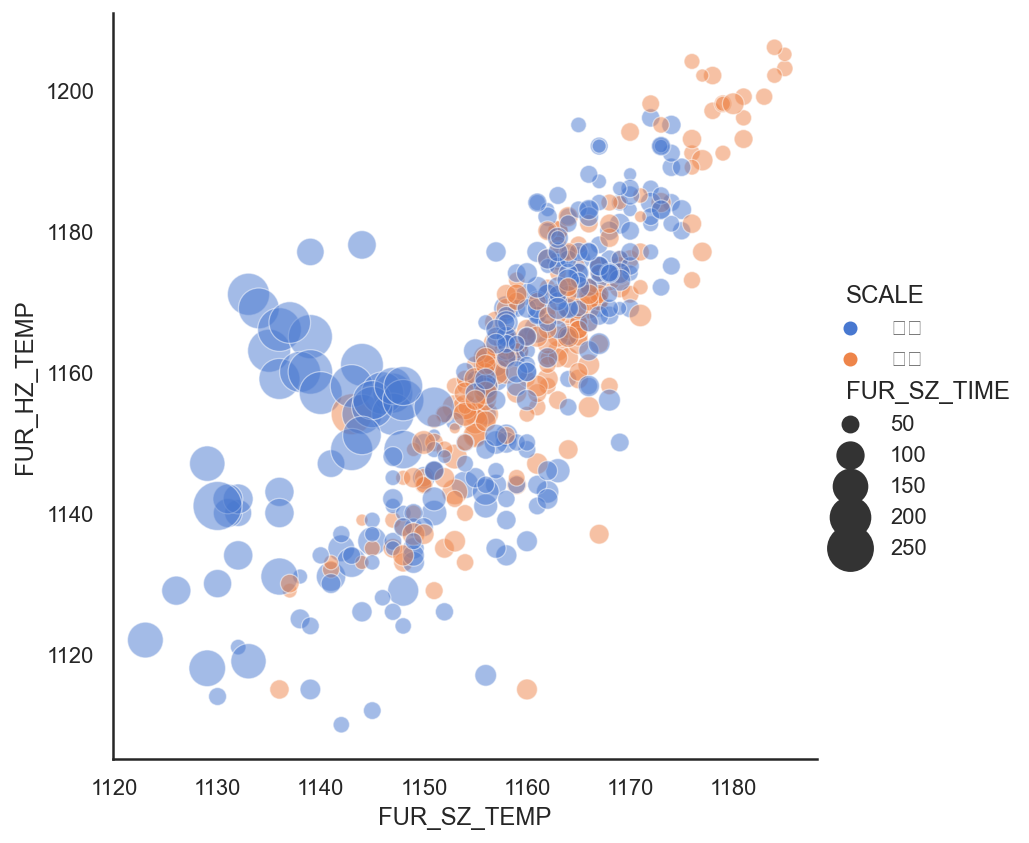

In [ ]:
#균열대 온도가 낮고 시간이 길수록 불량율이 매우 낮음.
#이것이 해답으로 보임.
sns.set_theme(style="white")
aaaaa = sns.relplot(x="FUR_SZ_TEMP", y="FUR_HZ_TEMP", hue="SCALE", size="FUR_SZ_TIME",
            sizes=(30, 600), alpha=.5, palette="muted",
            height=6, data=steel[steel['STEEL_KIND'] == 'C0'])

C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda3\lib\site-packages

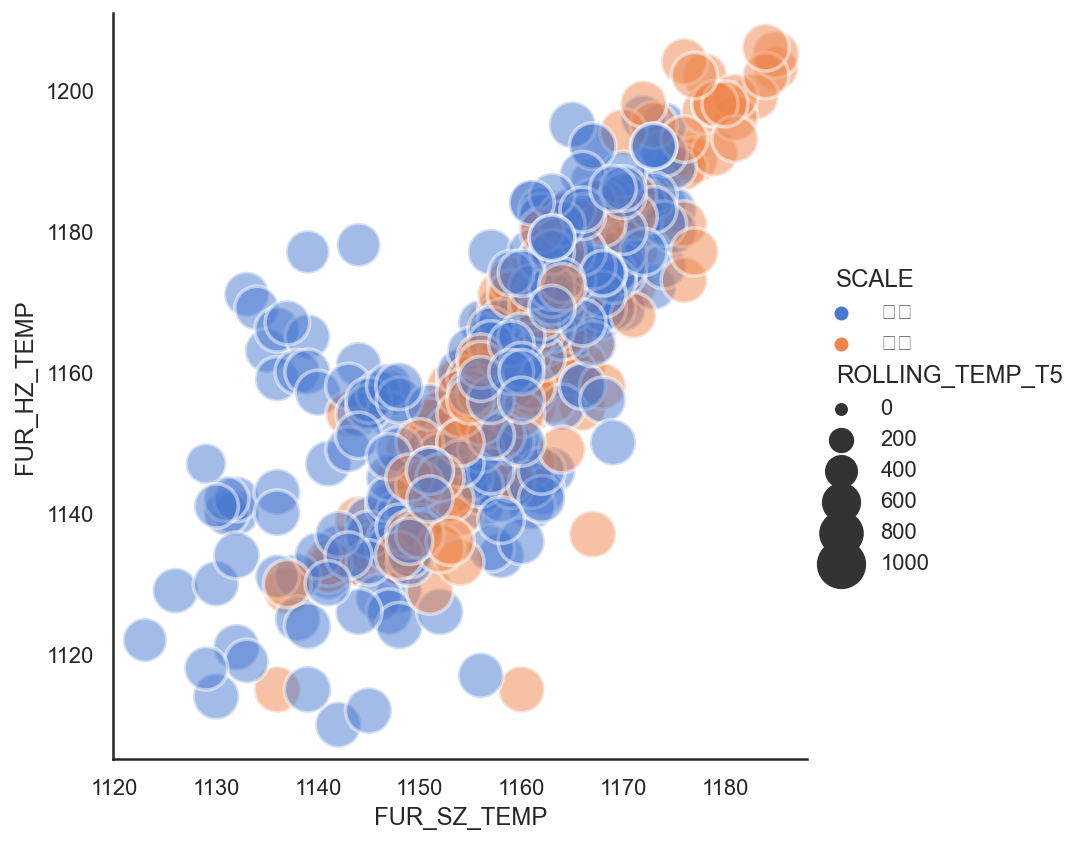

In [ ]:
sns.set_theme(style="white")
aaaaa = sns.relplot(x="FUR_SZ_TEMP", y="FUR_HZ_TEMP", hue="SCALE", size="ROLLING_TEMP_T5",
            sizes=(30, 600), alpha=.5, palette="muted",
            height=6, data=steel[steel['STEEL_KIND'] == 'C0'])

In [ ]:
#결론
각 호기별 2호선 점검 요망.
HSB공정은 문제없음.
C0를 제작하는 야간시간 작업자들에게 주의 요망 및 1조와 4조에게 세부사항 점검 및 교육 요망
가열로 내부 시간을 취사선택할 필요가 있음. 250초인지 300초인지.
균열대 온도를 낮추면 획기적으로 불량율이 줄어들것임.
덧붙여 균열대 시간이 길수록 불량율이 매우 낮음.
즉, 제강 공정에서는 가열로 시간을 줄이고 반대로 균열대 시간을 늘려야 함.
압연 공정에서는 롤링 출하 온도를 900도 내외로 맞춰 마무리 할 필요가 있음.

In [ ]:
#머신러닝에 앞서서 데이터 전처리 시작
steel_drop = steel.drop(columns = ['SPEC','Unnamed: 0.1'])
steel_drop

In [ ]:
steel_C0 = steel_drop[steel_drop['STEEL_KIND'] == 'C0']
steel_C0

In [ ]:
steel_C0_drop = steel_C0.drop(columns = ['STEEL_KIND','ROLLING_DATE', 'PLATE_NO', 'Unnamed: 0'])
steel_C0_drop

In [ ]:
steel_C0_drop = steel_C0_drop.replace({'불량':'0','양품':'1'}) # 불량을 0, 양품을 1로 변환
steel_C0_drop = steel_C0_drop.replace({'미적용':'0','적용':'1'}) # HSB 적용을 1, 미적용을 0으로 치환
steel_C0_drop

In [ ]:
steel_C0_drop = steel_C0_drop.replace({'1호기':'1', '2호기':'2','3호기':'3'})
steel_C0_drop = steel_C0_drop.replace({'1조':'1', '2조':'2','3조':'3', '4조':'4'})
steel_C0_drop
# 데이터 전처리 끝. 불량과 크게 관계없는 요소인 SPEC, 날짜, PLATE_NO 등을 제거하고, C0에 집중하기 위해 STEEL_KIND가 C0인 데이터만 이용하여 모델 생성.

In [ ]:
# Decisoin Tree 모델 생성. 조건을 쉽게 파악하기 위하여 Decisoin Tree를 사용해 분석.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

ng = steel_C0_drop[steel_C0_drop['SCALE']  == 0]
ok = steel_C0_drop[steel_C0_drop['SCALE']  == 1].sample(len(ng))

X = steel_C0_drop.drop(['SCALE'], axis = 1)
Y = steel_C0_drop['SCALE'].ravel()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model, class_names=["malignity", "positivity"],
          feature_names=model.feature_names_in_,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

# 데이터 양이 적어서인지 Decisoin Tree가 생각보다 단순하게 나온 것으로 예측.

In [ ]:
# max_depth 변경 (max depth = 3)
model_none_overfitting = DecisionTreeClassifier(max_depth = 3)
model_none_overfitting.fit(X_train, Y_train)

train_accuracy = model_none_overfitting.score(X_train, Y_train)
test_accuracy = model_none_overfitting.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model_none_overfitting, class_names=["malignity", "positivity"],
          feature_names=model_none_overfitting.feature_names_in_,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

In [ ]:
# max_depth 변경 (max depth = 5)
model_no_overfitting = DecisionTreeClassifier(max_depth = 5)
model_no_overfitting.fit(X_train, Y_train)

train_accuracy = model_no_overfitting.score(X_train, Y_train)
test_accuracy = model_no_overfitting.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model_no_overfitting, class_names=["malignity", "positivity"],
          feature_names=model_no_overfitting.feature_names_in_,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

In [ ]:
# max_depth 변경 (max depth = 2)
model_overfitting = DecisionTreeClassifier(max_depth = 2)
model_overfitting.fit(X_train, Y_train)

train_accuracy = model_overfitting.score(X_train, Y_train)
test_accuracy = model_overfitting.score(X_test, Y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model_overfitting, class_names=["malignity", "positivity"],
          feature_names=model_overfitting.feature_names_in_,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()
# Decisoin Tree 끝. max depth를 변경하여 정확도에 얼마나 영향을 미치는지 알아봤는데, 데이터 양이 작아서인지 max depth가 클수록 정확도가 높게 나옴.

In [ ]:
# RandomForest 모델 생성 (max_depth = 5, n_estimators=150). Decisoin Tree의 단점(랜덤성에 의존 등)을 보완하기 위해 RandomForest 모델을 적용.
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

clf_rf = RandomForestClassifier(max_depth = 5, n_estimators=150)
clf_rf.fit(X_train_std, Y_train)

pred_rf = clf_rf.predict(X_test_std)

rf_train_score = clf_rf.score(X_train_std, Y_train)
rf_test_score = clf_rf.score(X_test_std, Y_test)
print(f'랜덤포레스트 훈련 정확도는 {round(rf_train_score,3)} 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {round(rf_test_score,3)} 입니다.')

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, pred_rf)
print(conf_matrix)

from sklearn.metrics import classification_report
class_report = classification_report(Y_test, pred_rf)
print(class_report)

In [ ]:
# max depth, n estimators 변경 (max depth = 3, n estimators=200) 
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

clf_rf2 = RandomForestClassifier(max_depth = 3, n_estimators=200)
clf_rf2.fit(X_train_std, Y_train)

pred_rf2 = clf_rf2.predict(X_test_std)

rf2_train_score = clf_rf2.score(X_train_std, Y_train)
rf2_test_score = clf_rf2.score(X_test_std, Y_test)
print(f'랜덤포레스트 2 훈련 정확도는 {round(rf_train_score,3)} 입니다.')

# 높은 정확도의 모델 생성을 위해 max depth, n estimators를 변경하는 실험을 해보았으나, 정확도에 변동은 없었음.

In [ ]:
conf_matrix2 = confusion_matrix(Y_test, pred_rf2)
print(conf_matrix2)
class_report2 = classification_report(Y_test, pred_rf2)
print(class_report2)
# Randomforest 끝

In [ ]:
# Gradient Boosting 모델 생성(max depth = 3, learning rate = 0.01). 더 좋은 모델을 생성하기 위해 통상 성능이 더 좋은 Gradient Boosting를 사용
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth = 3, learning_rate = 0.01)
gbrt.fit(X_train_std, Y_train)
gbrt_train_score = gbrt.score(X_train_std, Y_train)
gbrt_test_score = gbrt.score(X_test_std, Y_test)
print(f'그레디언트부스팅 훈련 정확도는 {round(gbrt_train_score,3)} 입니다.')
print(f'그레디언트부스팅 테스트 정확도는 {round(gbrt_test_score,3)} 입니다.')

In [ ]:
pred_gbrt = gbrt.predict(X_test_std)

gbrt_conf = confusion_matrix(Y_test, pred_gbrt)
print(gbrt_conf)

gbrt_report = classification_report(Y_test, pred_gbrt)
print(gbrt_report)

In [ ]:
# max depth, learning rate 변경 (max depth = 5, learning rate = 0.02)

gbrt2 = GradientBoostingClassifier(max_depth = 5, learning_rate = 0.02)
gbrt2.fit(X_train_std, Y_train)
gbrt2_train_score = gbrt2.score(X_train_std, Y_train)
gbrt2_test_score = gbrt2.score(X_test_std, Y_test)
print(f'그레디언트부스팅 훈련 정확도는 {round(gbrt2_train_score,3)} 입니다.')
print(f'그레디언트부스팅 테스트 정확도는 {round(gbrt2_test_score,3)} 입니다.')

# 정확도 향상을 위한 실험을 위해 max depth, learning rate를 변경해 보았음. 그 결과, max depth, learning rate를 증가시켰을 때 정확도가 상승한 것을 알 수 있었음.

In [ ]:
pred_gbrt2 = gbrt2.predict(X_test_std)

gbrt2_conf = confusion_matrix(Y_test, pred_gbrt2)
print(gbrt2_conf)

gbrt2_report = classification_report(Y_test, pred_gbrt2)
print(gbrt2_report)
# Gradient Boosting 끝